In [1]:
# import packages for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# download raw data from s3 bucket
# save raw data to /data/raw
raw_data = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/travel_insurance.csv')
raw_data.to_csv('~/Documents/travel_insurance_analysis/data/raw/travel_insurance.csv')

## Understanding the data

In [3]:
raw_data.head(5) # output first five rows of the data

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
raw_data.info() # get info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


Data looks clean with no missing values

In [5]:
raw_data.describe() # generate descriptive stats of the data

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


A quick glance at the stats tell us that our flyers are young individuals with the age ranging from 25 to 35.
The average annual income is 900,000


In [6]:
raw_data.shape # get shape of the data

(1987, 9)

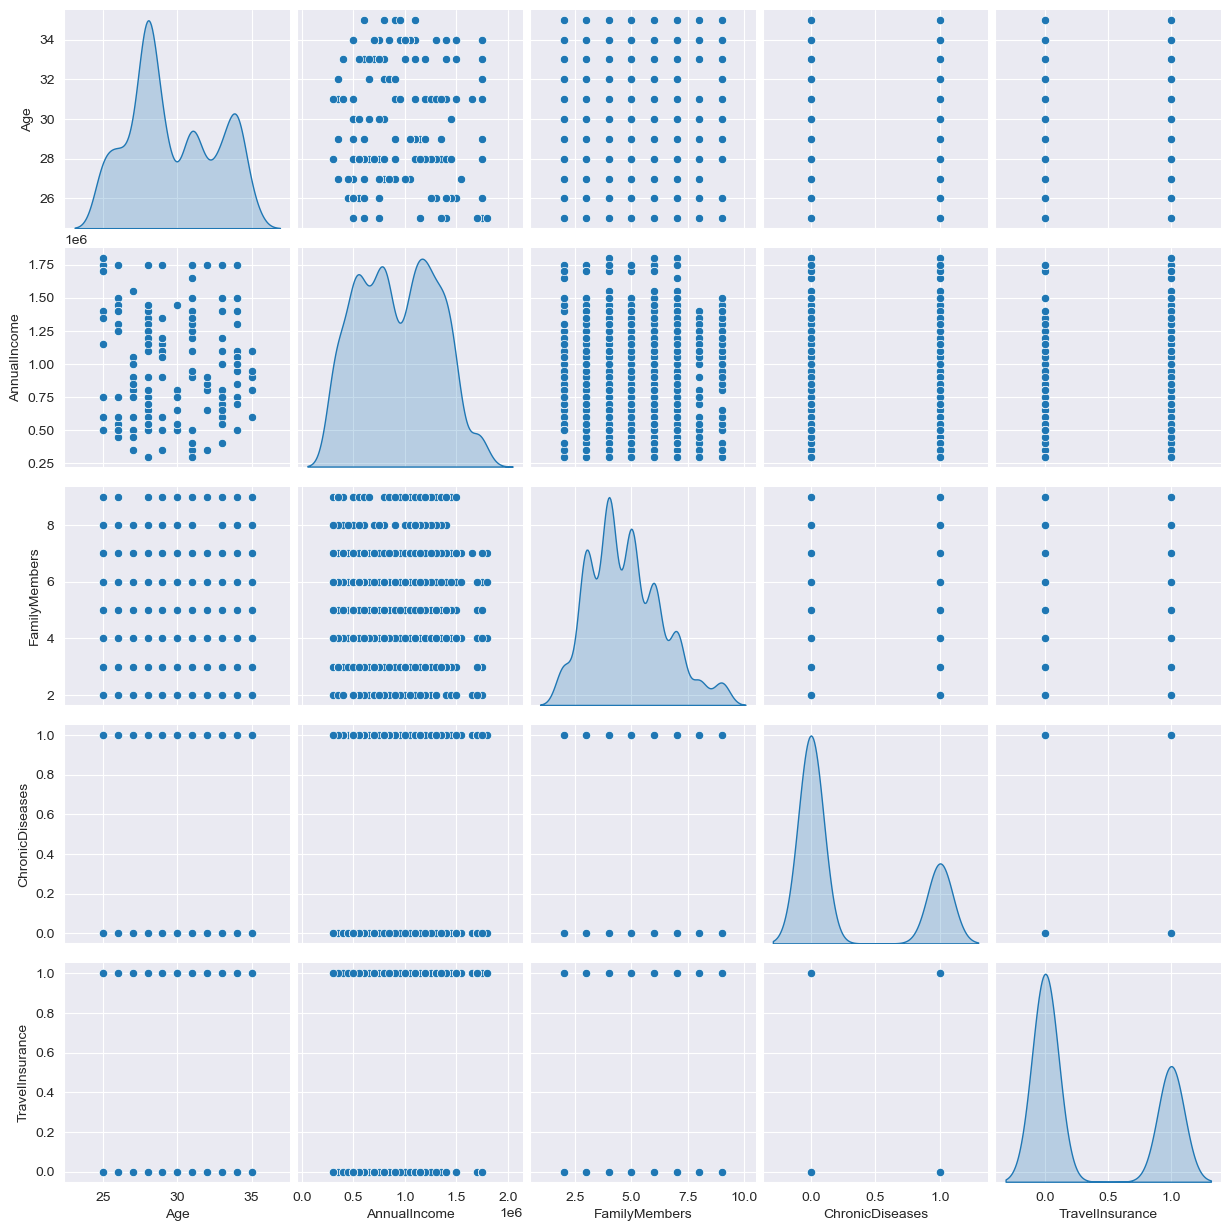

In [7]:
sns.pairplot(raw_data, diag_kind='kde')

Looking at the output of our pairplot, there isn't a clear correlation between the features in our dataset.
To confirm this, we will plot the heatmap of the correlation coefficient.

<AxesSubplot:>

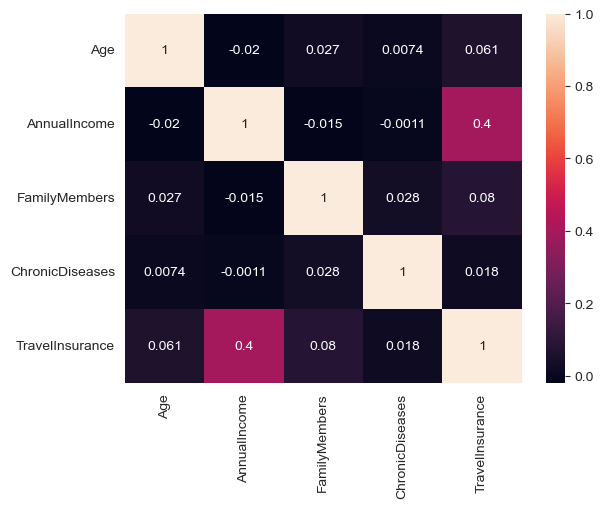

In [8]:
corrcoef = raw_data.corr()
sns.heatmap(corrcoef, annot=True)

We can confirm there is a weak correlation amongst the features in the dataset. Although, 'Annual Income' has a weak positive correlation with an individual getting a 'Travel Insurance'.

<AxesSubplot:xlabel='AnnualIncome', ylabel='Count'>

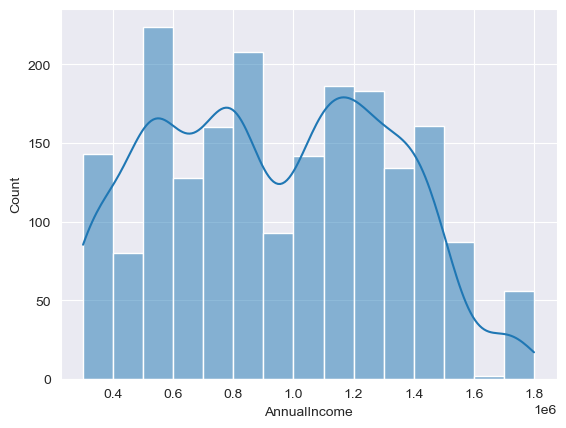

In [9]:
sns.histplot(data=raw_data, x='AnnualIncome', kde=True)

In [10]:
# we can create bins for the AnnualIncome column
# grouping an individual's income into 'Band 1', 'Band 2', or 'Band 3'
# Band 1 - low earners
# Band 2 - average earners
# Band 3 - top earners

max_income = raw_data.AnnualIncome.max()
min_income = raw_data.AnnualIncome.min()
bins = np.linspace(min_income, max_income, 4)

bands = ['Band 1', 'Band 2', 'Band 3']

raw_data['IncomeBands'] = pd.cut(raw_data.AnnualIncome, bins, labels=bands)

In [11]:
bins

array([ 300000.,  800000., 1300000., 1800000.])

In [12]:
raw_data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeBands
0,31,Government Sector,Yes,400000,6,1,No,No,0,Band 1
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,Band 2
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,Band 1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,Band 1
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,Band 1


In [13]:
raw_data.IncomeBands.value_counts(normalize=True)

Band 1    0.421274
Band 2    0.394945
Band 3    0.183781
Name: IncomeBands, dtype: float64

<AxesSubplot:>

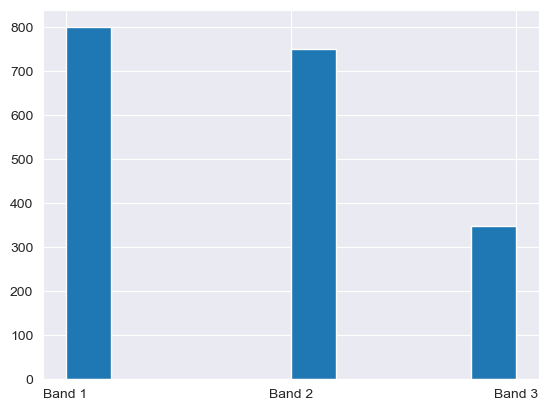

In [14]:
raw_data.IncomeBands.hist()

From our result, we can see that approximately 82% of individuals earn below 130,000 annually.

In [15]:
raw_data.groupby(['TravelInsurance', 'IncomeBands'])['AnnualIncome'].agg({'sum', 'mean'})

mean        sum
TravelInsurance IncomeBands                         
0               Band 1       5.978654e+05  364100000
                Band 2       1.101712e+06  611450000
                Band 3       1.569355e+06   48650000
1               Band 1       6.277487e+05  119900000
                Band 2       1.108462e+06  216150000
                Band 3       1.467767e+06  466750000

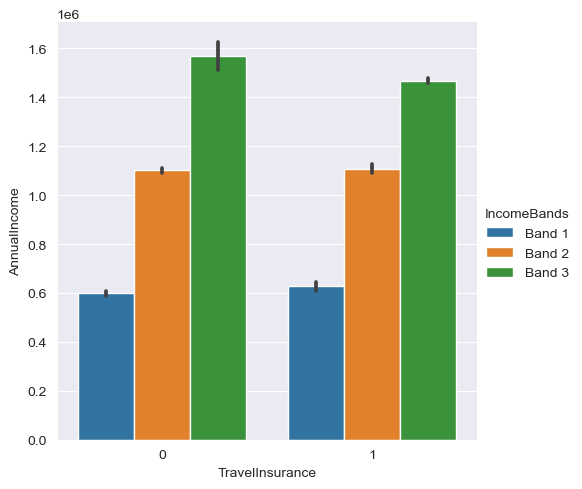

In [16]:
sns.catplot(data=raw_data, x="TravelInsurance", y='AnnualIncome', hue="IncomeBands", kind="bar")

From the above chart, the distribution of AnnualIncome on TravelInsurance is almost equal